# Set up

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

env = gym.make('CliffWalking-v0')

# Monte Carlo Method (with Exploring Start)

In [2]:
class MonteCarlo:
  def __init__(self, epsilon = 0.1, max_steps = 70, total_episode = 500, no_run = 101):
    self.epsilon, self.max_steps, self.total_episode = epsilon, max_steps, total_episode
    self.no_run = list(range(1,no_run))

  #choose action with epsilon greedy policy
  def choose_action(self, Q, state):
    if np.random.uniform(0, 1) < self.epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

  def play(self, Q): 
    t = 0
    state1 = env.reset() 
    done = False
    optimal_reward = 0

    while t < self.max_steps and not done:
      action1 = self.choose_action(Q, state1)
      state2, reward, done, info = env.step(action1)
      state1= state2
      t += 1
      optimal_reward += reward
    return optimal_reward

  def learning(self):
    #initialize the Q-matrix 
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    #intialize a random policy
    policy = []
    for i in range(0,48):
      n = random.randint(0,3)
      policy.append(n)
    #create an empty list to store returns for state-action pairs
    G = np.zeros((env.observation_space.n, env.action_space.n))
    #create an empty list to store the no. of times a state-action pair has been visited
    N = np.zeros((env.observation_space.n, env.action_space.n))
    total_optimal_rewards = np.zeros(self.total_episode)

    for i in self.no_run: 
      for episode in range(self.total_episode):
        t = 0
        state1 = random.randint(0,47) 
        action = random.randint(0,3)
        done = False
        episode_return = 0
        #record the starting point of this episode
        first_state  = state1
        first_action = action

        #generate an episode
        while t < self.max_steps and not done:
            prob, state2, reward, done = env.P[state1][action][0]
            episode_return += reward
            state1 = state2
            action = policy[state2]
            #Updating timestep
            t += 1
        
        #update Q at the end of an episode
        N[first_state][first_action] += 1 
        G[first_state][first_action] += episode_return
        Q[first_state][first_action] = G[first_state][first_action]/N[first_state][first_action]

        #update policy at the end of an episode
        policy = np.argmax(Q, axis = -1)

        #play the game once for evaluation
        optimal_reward = self.play(Q)
        total_optimal_rewards[episode] += optimal_reward
      
      return Q, total_optimal_rewards  
  
  # find best policy using the latest Q value
  def best_policy(self, Q):
    policy = np.argmax(Q, axis = -1)
    actions = ["^", ">", "v", "<"]
    policy_arrows = [actions[i] for i in policy]
    return pd.DataFrame(np.array(policy_arrows).reshape(4,12))
  

# Training

In [4]:
m1 = MonteCarlo()
Q_m, total_optimal_rewards_m = m1.learning()
m1.best_policy(Q_m)


,0,1,2,3,4,5,6,7,8,9,10,11
0,^,v,^,^,<,>,^,^,<,^,^,^
1,v,^,>,^,^,^,^,^,^,^,^,^
2,^,^,>,^,^,^,>,^,^,^,>,v
3,^,>,^,^,^,^,^,^,^,^,^,>


# Evaluation of Monte Carlo

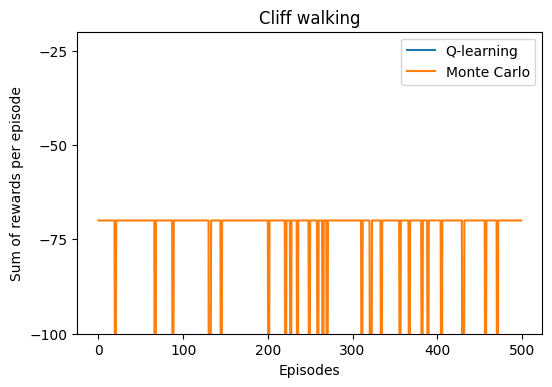

In [5]:
fig = plt.figure(dpi=100)

total_optimal_rewards_q = np.zeros(500)

ax = plt.axes()
q_sarsa_matrix = np.array([total_optimal_rewards_q, total_optimal_rewards_m]).transpose()
df = pd.DataFrame(q_sarsa_matrix, columns = ["Q-learning", "Monte Carlo"])

ax = sns.lineplot(data=df, x = df.index, y = "Q-learning")
ax = sns.lineplot(data=df, x = df.index, y = "Monte Carlo")
ax.set(title="Cliff walking", xlabel="Episodes", ylabel = "Sum of rewards per episode", yticks = range(-100, -20, 25))
ax.set_ylim(-100,-20)
ax.legend(["Q-learning", "Monte Carlo"])